In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from statistics import median
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

import skimage
from skimage import io
from skimage import viewer
from skimage.measure import label, regionprops

D:\Programmes\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [3]:
watershed = io.imread("Img/crop1_adipo_avg-watershed.tif", plugin="tifffile")

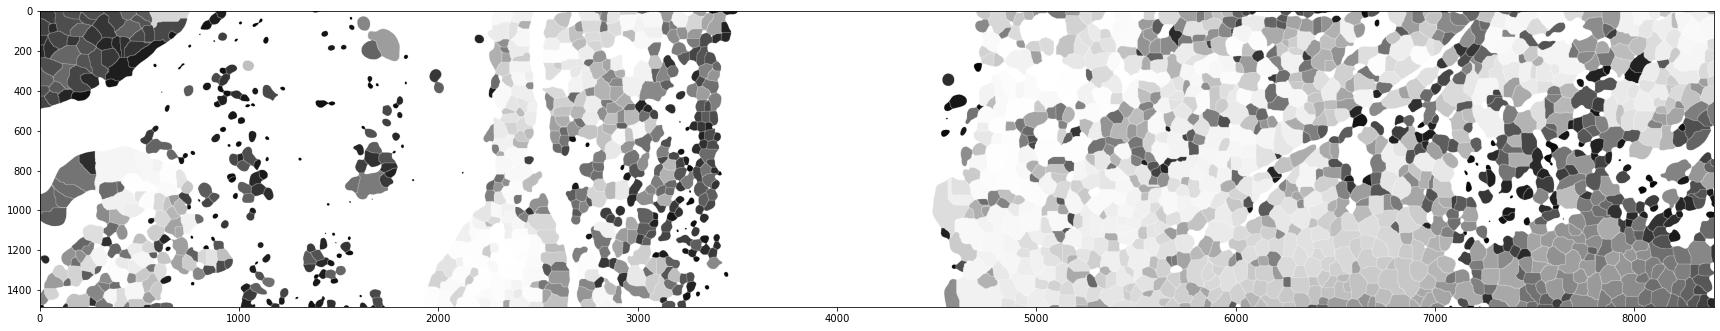

In [16]:
plt.figure(figsize=(30,10))
plt.imshow(watershed, cmap = "Greys")
plt.show()

In [5]:
label_wtshd = label(watershed)
regions = regionprops(label_wtshd)

In [6]:
regions

 ...]

In [7]:
#### Get Properties

n = len(regions)
x_fascia = 4000

regions_l = []
regions_r = []

x_c_l = []
y_c_l = []

x_c_r = []
y_c_r = []


#### Splitting the regions into 2 groups, left and right from the fascia. 

for props in regions:

    # Getting the centroids
    
    y0, x0 = props.centroid

    cond = x0 < x_fascia
    if (cond):
        x_c_l.append(x0)
        y_c_l.append(y0)
        regions_l.append(props)
        
    else:
        regions_r.append(props)
        x_c_r.append(x0)
        y_c_r.append(y0)
    
areas_l = []
eccent_l = []

#### Getting the wanted properties from the two groups

for props in regions_l:
    
    # Areas
    a = props.area
    areas_l.append(a)
    
    # Eccentricity
    e = props.eccentricity
    eccent_l.append(e)
    
areas_r = []
eccent_r = []

for props in regions_r:
    
    # Areas
    a = props.area
    areas_r.append(a)
    
    # Eccentricity
    e = props.eccentricity
    eccent_r.append(e)

In [8]:
#### Formating Data

Dict_l = {"X_Centroid": x_c_l, "Y_Centroid": y_c_l, "Area": areas_l, "Eccentricity" : eccent_l}
df_l = pd.DataFrame(Dict_l)

Dict_r = {"X_Centroid": x_c_r, "Y_Centroid": y_c_r, "Area": areas_r, "Eccentricity" : eccent_r}
df_r = pd.DataFrame(Dict_r)

df = pd.concat([df_l, df_r], keys = ['Left', 'Right'])
df

X_Centroid   Y_Centroid  Area  Eccentricity
Left  0       41.289263    26.062096  3865      0.745537
      1      125.493016    59.051830  8663      0.622179
      2      162.958569    16.979816  2824      0.886196
      3      265.299968    15.902439  3157      0.905756
      4      378.827856    41.470166  6268      0.733906
...                 ...          ...   ...           ...
Right 1152  5090.744019  1478.909091   418      0.976219
      1153  5225.994545  1478.530909   550      0.983552
      1154  7078.701299  1480.857143    77      0.902487
      1155  7177.144796  1480.470588   221      0.984177
      1156  7224.142857  1482.392857    28      0.981802

[1901 rows x 4 columns]

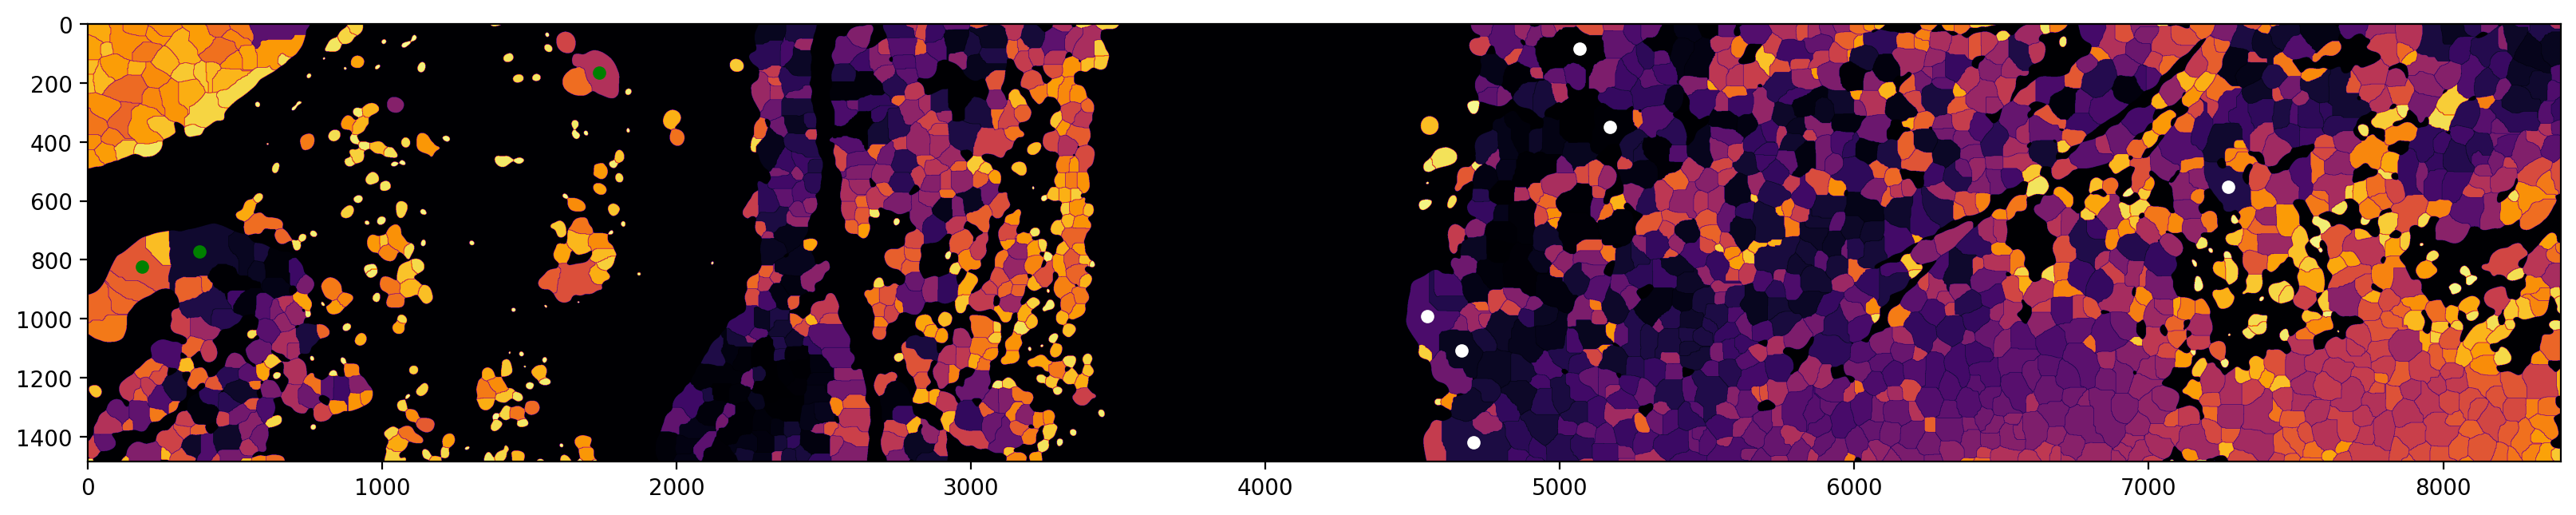

In [9]:
#### Clearing Data

# Locating large regions

large_x_c_r = df[df['Area'] > 15000]["X_Centroid"].loc[["Right"]]
large_y_c_r = df[df['Area'] > 15000]["Y_Centroid"].loc[["Right"]]

large_x_c_l = df[df['Area'] > 15000]["X_Centroid"].loc[["Left"]]
large_y_c_l = df[df['Area'] > 15000]["Y_Centroid"].loc[["Left"]]

# Ploting them

fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
fig.set(dpi = 200)
ax.imshow(watershed, cmap = plt.cm.inferno)

plt.plot(large_x_c_r, large_y_c_r, '.w', markersize = 10)
plt.plot(large_x_c_l, large_y_c_l, '.g', markersize = 10)

plt.show()

In [9]:
df = df[df['Area'] <= 15000]

df

X_Centroid   Y_Centroid  Area  Eccentricity
Left  0       41.289263    26.062096  3865      0.745537
      1      125.493016    59.051830  8663      0.622179
      2      162.958569    16.979816  2824      0.886196
      3      265.299968    15.902439  3157      0.905756
      4      378.827856    41.470166  6268      0.733906
...                 ...          ...   ...           ...
Right 1152  5090.744019  1478.909091   418      0.976219
      1153  5225.994545  1478.530909   550      0.983552
      1154  7078.701299  1480.857143    77      0.902487
      1155  7177.144796  1480.470588   221      0.984177
      1156  7224.142857  1482.392857    28      0.981802

[1892 rows x 4 columns]

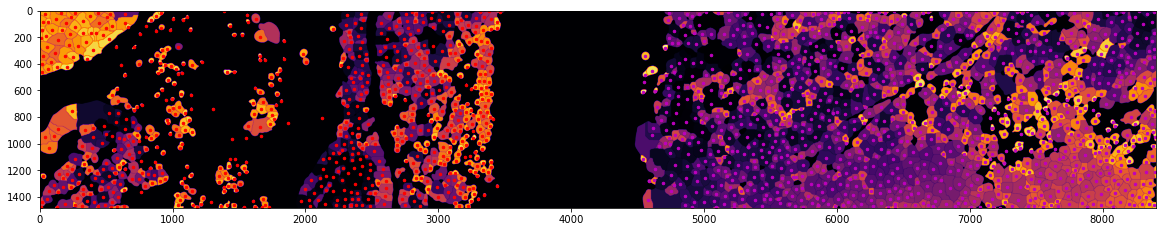

In [10]:
fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
ax.imshow(watershed, cmap = plt.cm.inferno)

plt.plot(df.loc[["Left"]]["X_Centroid"],df.loc[["Left"]]["Y_Centroid"], '.r', markersize = 5)
plt.plot(df.loc[["Right"]]["X_Centroid"],df.loc[["Right"]]["Y_Centroid"], '.m', markersize = 5)

plt.show()

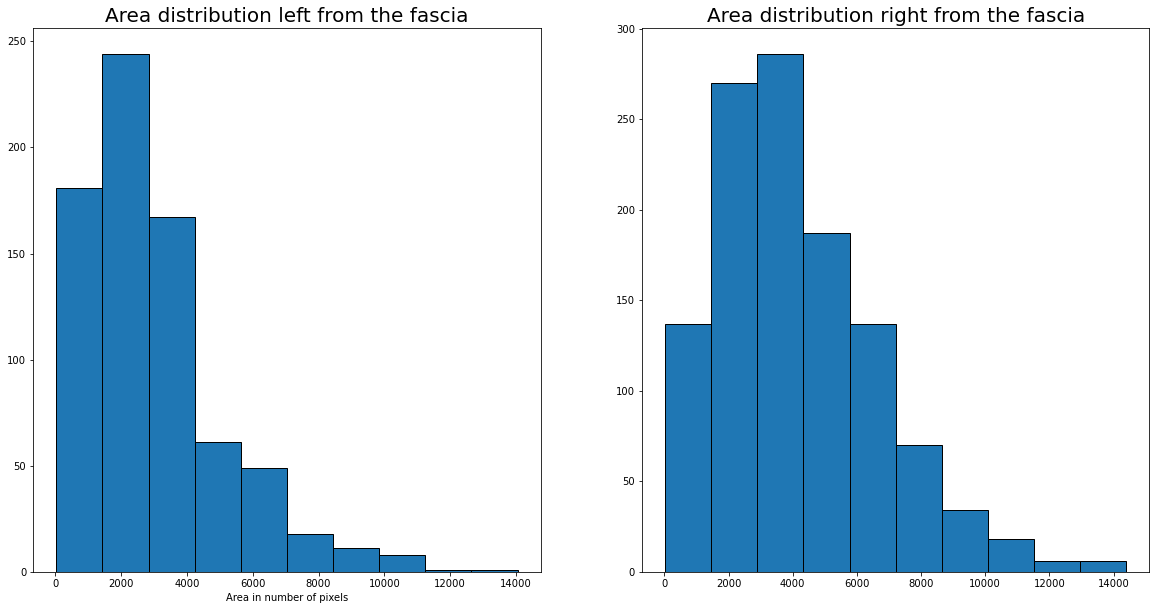

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(df.loc[["Left"]]["Area"], color = 'tab:blue', edgecolor = 'k')
axs[0].set_title("Area distribution left from the fascia", size=20)
axs[0].set_xlabel("Area in number of pixels")


axs[1].hist(df.loc[["Right"]]["Area"], color = 'tab:blue', edgecolor = 'k')
axs[1].set_title("Area distribution right from the fascia", size=20)


plt.show()

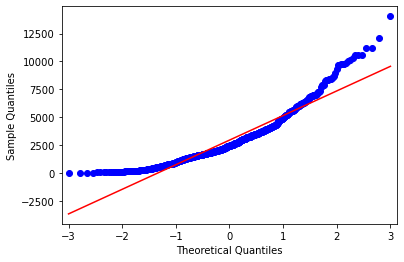

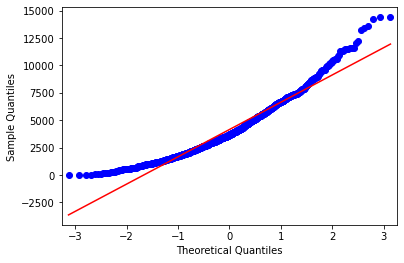

In [12]:
qqplot(np.array(df.loc[["Left"]]["Area"]), line = 's')
qqplot(np.array(df.loc[["Right"]]["Area"]), line = 's')
plt.show()

In [13]:
def Average(lst):
    return sum(lst)/len(lst)

In [14]:
Area_Average_l = Average(df.loc[["Left"]]["Area"])
Area_Median_l = median(df.loc[["Left"]]["Area"])

Area_Average_r = Average(df.loc[["Right"]]["Area"])
Area_Median_r = median(df.loc[["Right"]]["Area"])

print("Aire moyenne des régions à gauche du fascia :", Area_Average_l)
print("Aire moyenne des régions à droite du fascia :", Area_Average_r)

print("\nAire médiane des régions à gauche du fascia :", Area_Median_l)
print("Aire médiane des régions à droite du fascia :", Area_Median_r)

Aire moyenne des régions à gauche du fascia : 2945.1039136302293
Aire moyenne des régions à droite du fascia : 4156.7862728062555

Aire médiane des régions à gauche du fascia : 2423
Aire médiane des régions à droite du fascia : 3673


In [15]:
Eccent_Median_l = median(df.loc[["Left"]]["Eccentricity"])

Eccent_Median_r = median(df.loc[["Right"]]["Eccentricity"])

print("Eccentricité médiane des régions à gauche du fascia :", Eccent_Median_l)
print("Eccentricité médiane des régions à droite du fascia :", Eccent_Median_r)


Eccentricité médiane des régions à gauche du fascia : 0.6797371637788023
Eccentricité médiane des régions à droite du fascia : 0.7112838142894085


In [16]:
log_areas_l = np.log(df.loc[["Left"]]["Area"])
log_areas_r = np.log(df.loc[["Right"]]["Area"])

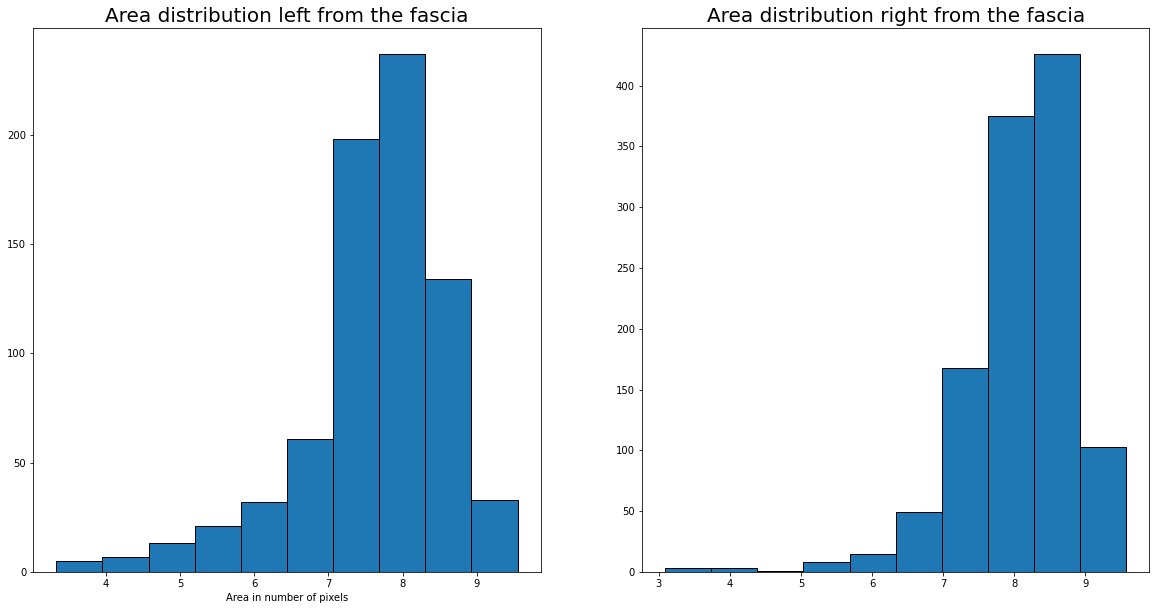

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(log_areas_l, color = 'tab:blue', edgecolor = 'k')
axs[0].set_title("Area distribution left from the fascia", size=20)
axs[0].set_xlabel("Area in number of pixels")


axs[1].hist(log_areas_r, color = 'tab:blue', edgecolor = 'k')
axs[1].set_title("Area distribution right from the fascia", size=20)


plt.show()

In [18]:
stat_shapiro_l, p_shapiro_l = shapiro(log_areas_l)
stat_shapiro_r, p_shapiro_r = shapiro(log_areas_r)

print("p-valeur du test de shapiro sur les aires des régions à gauche du fascia :\n", p_shapiro_l)
print("p-valeur du test de shapiro sur les aires des régions à droite du fascia :\n", p_shapiro_r)

p-valeur du test de shapiro sur les aires des régions à gauche du fascia :
 8.318375424664732e-21
p-valeur du test de shapiro sur les aires des régions à droite du fascia :
 3.475884775411853e-26


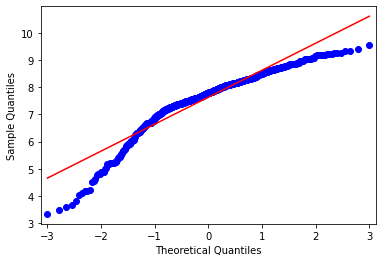

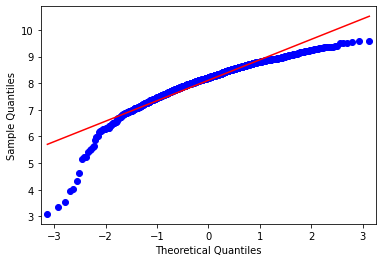

In [19]:
qqplot(log_areas_l, line = 's')
qqplot(log_areas_r, line = 's')
plt.show()

In [20]:
stat_student, p_student = ttest_ind(log_areas_l, log_areas_r)

print("P-valeur du test de student d'égalité des moyennes :\n", p_student)

P-valeur du test de student d'égalité des moyennes :
 2.610506415161477e-30


In [21]:
stat_MWU, p_MWU = mannwhitneyu(df.loc[["Left"]]["Area"], df.loc[["Right"]]["Area"])

print("P-valeur du test de Mann-Whitney d'égalité des distributions :\n", p_MWU)

P-valeur du test de Mann-Whitney d'égalité des distributions :
 6.390405216308145e-31
